# GRIP internship

## Simple Linear Regression

<mark>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

#### Importing Essential libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

#### Getting Data

In [5]:
data = pd.read_csv('student_scores.csv')

In [117]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Checking If there are any Null values or Not.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Descriptive Statistics

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualisation

In [12]:
import seaborn as sns

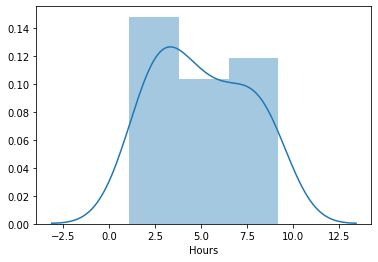

In [15]:
sns.distplot(data['Hours'])

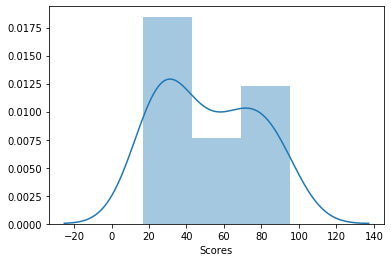

In [17]:
sns.distplot(data['Scores'])

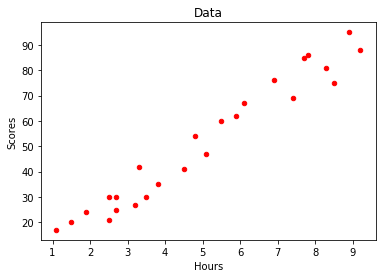

In [24]:
data.plot(kind = 'scatter', x='Hours', y='Scores',c= 'r')
plt.title("Data")
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Dividing Data into Dependent and Independent Variables

In [46]:
X = data.iloc[:,0:1]
y = data.iloc[:,1]

#### Spliting Dataset into Test and Training Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [50]:
regressor = LinearRegression()

In [51]:
model = regressor.fit(X_train,y_train)

#### Predicted Line

In [52]:
prediction = regressor.coef_*X + regressor.intercept_

### Plotting the Training data

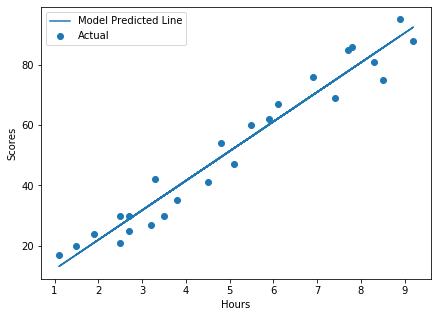

In [110]:
plt.figure(figsize = (7,5))
plt.scatter(X, y, label = 'Actual')
plt.plot(X, prediction, label = 'Model Predicted Line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [112]:
a = regressor.intercept_
print('This represents that student will get ', a, '% marks if he/she study for 0 hrs')

This represents that student will get  2.370815382341881 % marks if he/she study for 0 hrs


In [115]:
x = regressor.coef_
print('This represents score will increase by ', x[0], '% for unit change in hours studied.')

This represents score will increase by  9.788566686749046 % for unit change in hours studied.


In [65]:
y_pred = regressor.predict(X_test)

In [72]:
comparison = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comparison.reset_index(drop = True)

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### Plotting the Test Data set

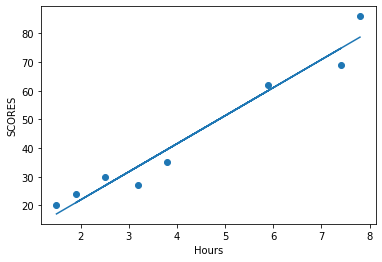

In [73]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.xlabel('Hours')
plt.ylabel('SCORES')
plt.show()

In [96]:
print('Score = ', regressor.score(X_test, y_test))
print('Mean Absolute Error = ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 SCORE = ', r2_score(y_test, y_pred))

Score =  0.9568211104435257
Mean Absolute Error =  4.419727808027652
Root Mean Squared Error =  4.792191274636315
r2 SCORE =  0.9568211104435257


In [100]:
hours = [[9.25]]
score = regressor.predict(hours)
score

array([92.91505723])

In [116]:
print('The student will get', score[0], "% marks if he/she studies for 9.25 hrs.")

The student will get 92.91505723477056 % marks if he/she studies for 9.25 hrs.
